### Anastasya Rysmyatova (MMP, MSU, Russia)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from IPython.display import HTML
from matplotlib.ticker import FuncFormatter
from pylab import rcParams
from matplotlib import animation

%matplotlib inline

In [4]:
import seaborn

### Read data 

In [5]:
ss = "/Users/samrioboli/Documents/ds320crime/data/crime.csv"

Data = pd.read_csv(ss)

### Sort the data in order of the date of the crime

In [6]:
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data.Dispatch_Date_Time = Dat
Data.sort_values(by='Dispatch_Date_Time', inplace=True)
Data.index = np.array(range(Data.shape[0]))
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['all_hour'] = abs(Dat - Dat[0]).dt.total_seconds() / 3600.0

## Animation

Let's see how the offences occurred over time. Choose the crimes that happened since the beginning of 2006 over 5,000 hours.
Draw the crimes on a map, using video. Each frame depicts crime occurred in 4 hours.
Red indicates crimes that occurred on the day. Blue, which happened last night.




In [ ]:
"""import numpy as np
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,9))

m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(),\
             llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)

x, y = m(Data.Lon[(Data.Lon.isnull()==False) ], \
        Data.Lat[(Data.Lat.isnull() == False)])

m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)

a, b = m(Data.Lon.min(), Data.Lat.min())
graph = m.plot(a, b, 'ro', markersize=6, alpha = 1.0)[0]

all_hour = Data.all_hour[(Data.Lon.isnull()==False) ] 
def animate(i):
    lons = x[(all_hour < i+4) & (all_hour >= i) ]

    lats = y[(all_hour < i+4) & (all_hour >= i) ]
    graph.set_data(lons, lats)
    if (i % 24 >=23) | (i % 24 <= 7):
        graph.set_color('b')
    else:
        graph.set_color('r')
    return graph
anim = FuncAnimation(plt.gcf(), animate, repeat=True, frames=5000, interval=100)"""

In [ ]:
#from IPython.display import HTML
#HTML(anim.to_html5_video())

to view the visualization, click on the 
[**LINK**][1]


  [1]: http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/60wzl584jvkmuag/Untitled1.ipynb
  

It is seen that at night there is less crime than during the day.



### Let's see how many crimes happen by days, by months, by years  

In [7]:
Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['month'] = Dat.dt.month
Data['year'] = Dat.dt.year
Data['day'] = Dat.dt.day
Group = Data.groupby(['year', 'month', 'day'])['day'].count()
Count = Group.to_frame(name='count').reset_index()
#fig, ax = plt.subplots(figsize=(15,5))
#ax.plot_date(Data.Dispatch_Date.unique(), Count['count'], '-')
#ax.set_ylabel('number of crimes')
#ax.set_xlabel('date')
#ax.set_title('number of crimes by day')

Dat = pd.to_datetime(Data.Dispatch_Date_Time)
Data['month'] = Dat.dt.month
Data['year'] = Dat.dt.year
Group = Data.groupby(['year', 'month'])['month'].count()
Count = Group.to_frame(name='count').reset_index()
#fig, ax = plt.subplots(figsize=(15,5))
#ax.plot_date(Data.Month.unique(), Count['count'], '-')
#ax.set_ylabel('number of crimes')
#ax.set_xlabel('date')
#ax.set_title('number of crimes by month')

Group = Data.groupby(['year'])['year'].count()
Count = Group.to_frame(name='count').reset_index()
#fig, ax = plt.subplots(figsize=(15,5))
#ax.plot_date(Data.year.unique(), Count['count'], '-')
#ax.set_ylabel('number of crimes')
#ax.set_xlabel('date')
#ax.set_title('number of crimes by year')

![day][1]
![month][2]
![year][3]


  [1]: https://pp.vk.me/c637625/v637625621/138b0/3TEadaoS8K8.jpg
  [2]: https://pp.vk.me/c637625/v637625621/138a7/V3-3a6IUfDM.jpg
  [3]: https://pp.vk.me/c637625/v637625621/1389e/xZ50PoES3y0.jpg

On the chart of crimes by day visible seasonality.
From the graph of the crimes by months of visible frequency, in summer, is made considerably more crimes than in the winter.
Looking at the total number of crimes per year from 2006 to 2015, it is clear that the total number of crimes is decreasing every year.

### Let's see how it changes the total number of crimes per year in each of the Police_Districts 



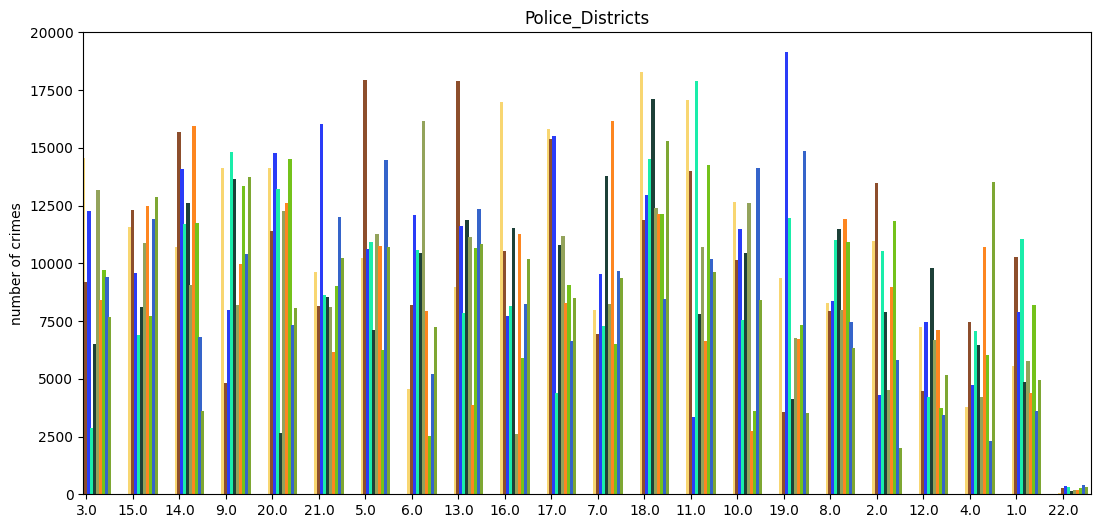

In [8]:
color = np.random.rand( Data.Police_Districts.value_counts(sort = False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 6
for i in range(2006, 2016): 
    crimes = np.array( Data.Police_Districts[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Police_Districts')
    plt.xticks(ind+width, Data.Police_Districts[Data.year == 2006].value_counts(sort= False).index)
    plt.axis([0, 26, 0.0, 20000])
    c += 1

plt.show()

It is evident that most police stations every year the number of crimes is reduced (for example 4.0, 0.0, 10.0, 18.0, 6.0)
But there are areas where the number of crimes increased (e.g. 15.0)

### Let's see how it changes the total number of crimes per year for each Text_General_Code



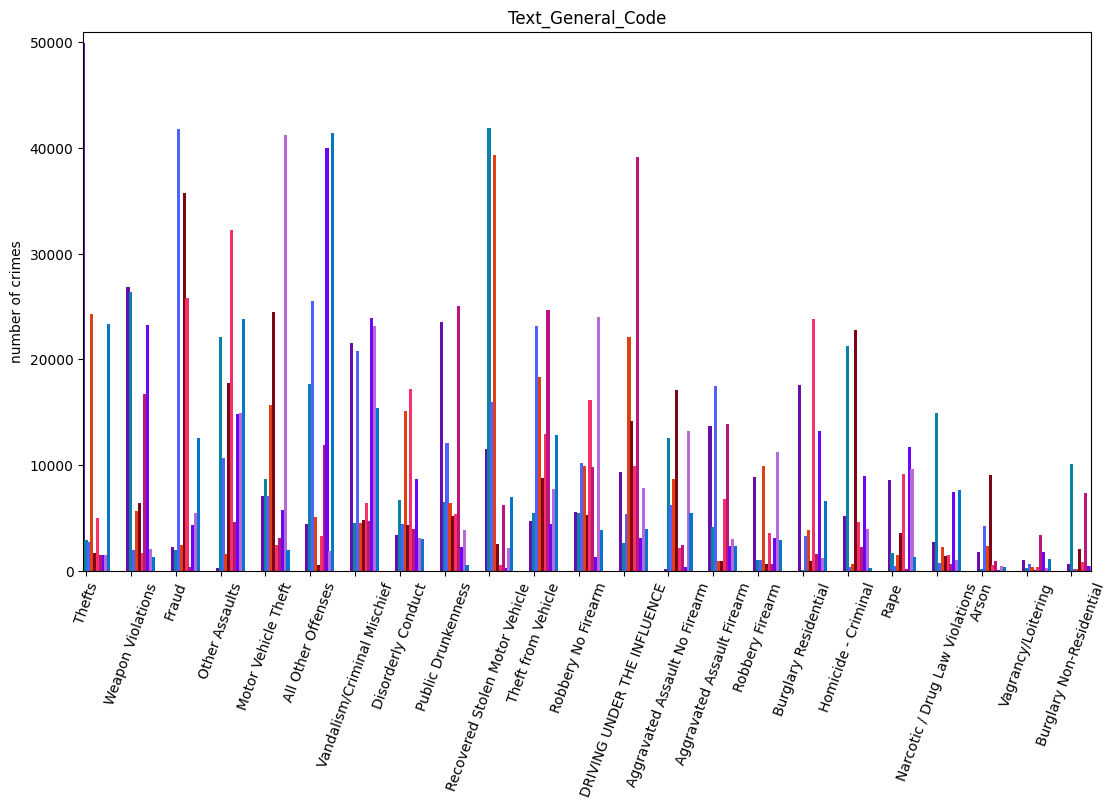

In [9]:
color = np.random.rand( Data.Text_General_Code.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array( Data.Text_General_Code[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Text_General_Code')
    plt.xticks(ind+width, Data.Text_General_Code[Data.year == i].value_counts(sort= False).index, rotation = 70)
    plt.axis([0, 27, 0.0, 51000])
    c += 1

plt.show()

Some Text_General_Code acting weird



### Let's see how it changes the total number of crimes per year in each month



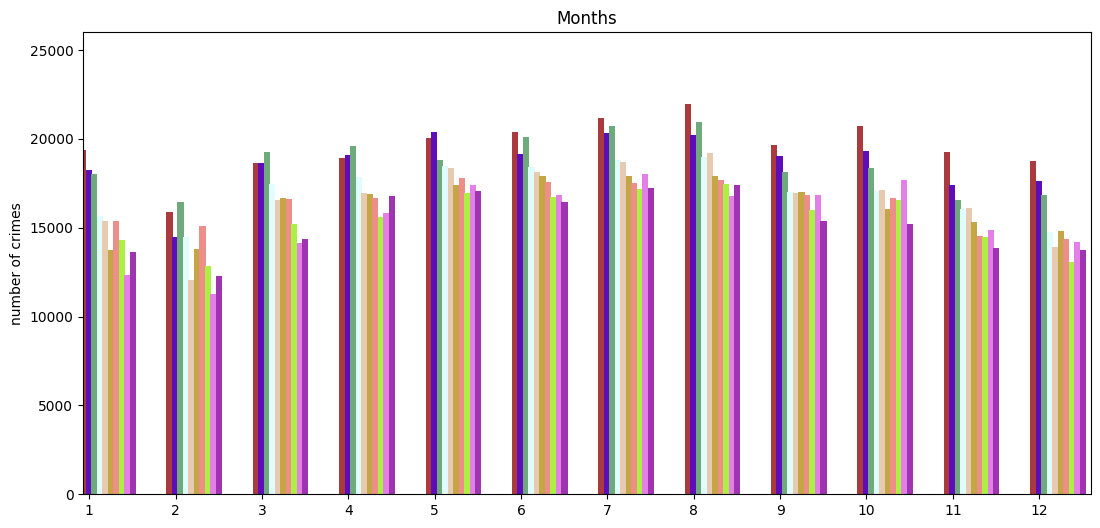

In [10]:
color = np.random.rand( Data.month.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 6
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array( Data.month[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Months')
    plt.xticks(ind+width, Data.month[Data.year == i].value_counts(sort= False).index)
    plt.axis([0, 14, 0.0, 26000])
    c += 1

plt.show()

On the x-axis is months.

1 - January.

12 - December.

It is seen that in winter there is less crime than in the summer. Every year it becomes less of crimes for each month.



### Let's see how it changes the total number of crimes per year in each hour.

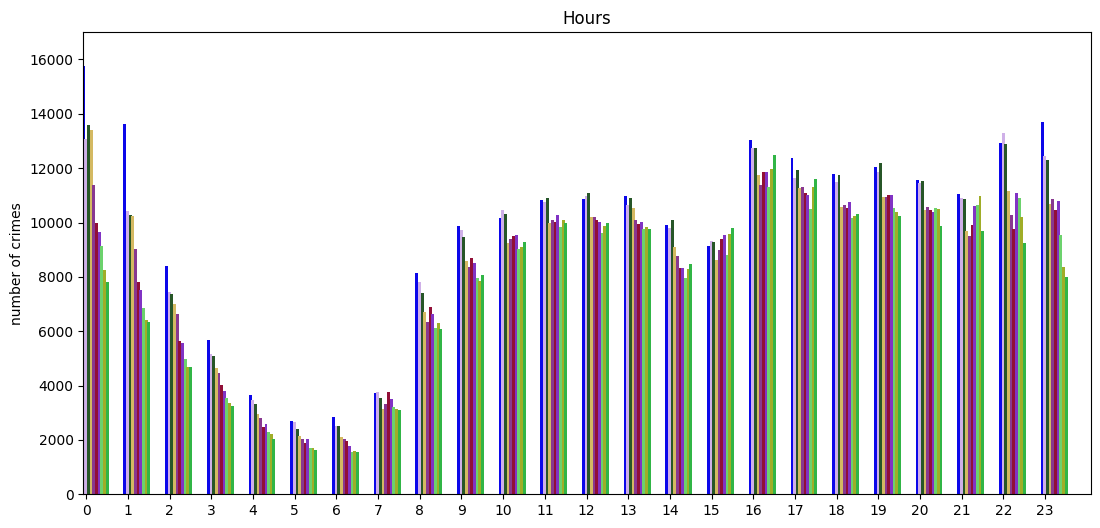

In [11]:
color = np.random.rand( Data.Hour.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 13, 6
fig, ax = plt.subplots()
for i in range(2006, 2016):  
    crimes = np.array( Data.Hour[Data.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Hours')
    plt.xticks(ind+width, Data.Hour[Data.year == i].value_counts(sort= False).index)
    plt.axis([0, 29, 0.0, 17000])
    c += 1

plt.show()

On the x-axis is hours.

It is seen that from 3:00 - 7:00 there is less crimes. 
It is seen that in 2015, significantly reduced the number of crimes between 23:00 - 2:00 hours than in 2006.



### Let's see how are distributed the crimes on the map.

Use the data only for 2015


In [12]:
m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(), 
            llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)
x, y = m(tuple(Data.Lon[(Data.Lon.isnull()==False) & (Dat.dt.year == 2015)]), \
         tuple(Data.Lat[(Data.Lat.isnull() == False) & (Dat.dt.year == 2015)]))

#plt.figure(figsize=(20,10))
#m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
#m.plot(x,y,'ro',markersize=1, alpha=.3 )

NameError: name 'Basemap' is not defined

![crimes][1]


  [1]: https://pp.vk.me/c637625/v637625621/13895/Omh31Vs76BY.jpg

It is seen that in some places the crimes occurred often, some less often.

Видно, что в некоторых местах преступления происходили часто, в некоторых реже.

### Police_Districts

In [ ]:
color = np.random.rand(Data.Police_Districts.unique().shape[0], 3)
#plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(), 
            llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)
#m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
for i in Data.Police_Districts.unique():
    x, y = m(tuple(Data.Lon[(Data.Lon.isnull()==False) & (Data.Police_Districts == i)]), \
         tuple(Data.Lat[(Data.Lat.isnull() == False) & (Data.Police_Districts == i)]))

    #m.plot(x,y,'ro',markersize=1,alpha=.3, color = color[c] )

    c += 1

![D][1]


  [1]: https://pp.vk.me/c637625/v637625621/13875/KIBbAJmRf_8.jpg

The map shows how divided police districts (Police_Districts).



### Look at any police districts most of the crimes were committed in 2015

In [ ]:
from matplotlib import cm
import matplotlib as mpl
# color = np.random.rand(Data.Police_Districts.unique().shape[0], 3)
plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(), 
            llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)
#m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
des = np.ones(Data.Police_Districts.unique().shape[0])
for i in range(Data.Police_Districts.unique().shape[0]):
    des[i] = Data.Lon[(Data.Lon.isnull()==False) & (Data.Police_Districts == i)].shape[0]

colors = []
for i in range(Data.Police_Districts.unique().shape[0]):
    
    x, y = m(Data.Lon[(Data.Lon.isnull()==False) & (Data.Police_Districts == i)], \
       Data.Lat[(Data.Lat.isnull() == False) & (Data.Police_Districts == i)])

    c = (des[i]/des.max(), 0.0, 0.0)
    m.scatter(x,y,s=10,alpha=1, color = c)
    colors += [c]

sm = cm.ScalarMappable(cmap='Reds')
sm.set_array(colors)

m.colorbar(sm, location='right',pad='5%')
plt.title('Distribution of crimes between the police districts')



The figure shows the percentage of crime in each police districts.
black - no crimes
red - crimes a lot
It is seen that in the center of the city, commit more crimes. Visible areas on the outskirts of the city where commit a few crimes&

### View on the street where were more than 1,000 crimes in 2015

Extract the street name from the characteristic Location_Block

In [ ]:
stret = Data.Location_Block.str.split(' ')#[:][:-2]
L = list(stret)
Mas = []
for i in L:
    Mas.append(list(i[-2:])) 
mas = []
for i in range(len(Mas)):
    mas.append(' '.join(Mas[i]))
    
Data['stret'] = mas

mas = []

# plt.figure(figsize=(20,10))
# m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(), 
#             llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)
# m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
# c = 0
# des = np.ones(Data.stret.unique().shape[0])
# uniq = Data.stret.unique()
# for i in range(Data.stret.unique().shape[0]):
#      des[i] = Data.Lon[(Data.Lon.isnull()==False) & (Data.stret == uniq[i])& (Data.year == 2015)].shape[0]


#for i in range(Data.stret.unique().shape[0]):
#    if des[i] > 1000:
#        x, y = m(Data.Lon[(Data.Lon.isnull()==False) & (Data.stret == uniq[i])& (Data.year == 2015)], \
#           Data.Lat[(Data.Lat.isnull() == False) & (Data.stret == uniq[i])& (Data.year == 2015)])

#        m.scatter(x,y,s=3,alpha=1, color = [des[i]/des.max(), 0.0, 0.0] )

![St][1]


  [1]: https://pp.vk.me/c636128/v636128621/275ab/PHgK7SruFO4.jpg

streets with the highest number of crimes highlighted in red

### Psa

In [ ]:
color = np.random.rand(Data.Psa.unique().shape[0], 3)

# plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(), 
            llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)
# m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
for i in Data.Psa.unique():
    x, y = m(tuple(Data.Lon[(Data.Lon.isnull()==False) & (Data.Psa == i)]), \
         tuple(Data.Lat[(Data.Lat.isnull() == False) & (Data.Psa == i)]))

    # m.plot(x,y,'ro',markersize=1, alpha = 0.1, color = color[c] )
    c += 1

![P][1]


  [1]: https://pp.vk.me/c637625/v637625621/1386d/vAoXFGElHqs.jpg

The map shows how divided Psa.


### Dc_Dist

In [ ]:
color = np.random.rand(Data.Dc_Dist.unique().shape[0], 3)

# plt.figure(figsize=(20,10))
m = Basemap(projection='mill', llcrnrlat=Data.Lat.min(), urcrnrlat=Data.Lat.max(), 
            llcrnrlon=Data.Lon.min(), urcrnrlon=Data.Lon.max(), resolution='c', epsg=4269)
# m.arcgisimage(service="NatGeo_World_Map", xpixels=3000, verbose=True)
c = 0
for i in Data.Dc_Dist.unique():
    x, y = m(tuple(Data.Lon[(Data.Lon.isnull()==False) & (Data.Dc_Dist == i)]), \
         tuple(Data.Lat[(Data.Lat.isnull() == False) & (Data.Dc_Dist == i)]))

    # m.plot(x,y,'ro',markersize=1, alpha = 0.1, color = color[c] )
    c += 1

![C][1]


  [1]: https://pp.vk.me/c637625/v637625621/13865/yG-ZF47uyfI.jpg

The map shows how divided Dc_Dist.

